# **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# setting the environment to kaggle_folder that has been created in the google drive associated with the colab notebook
# in other words it could be stated that this is an absolute path for the colab notebook

import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_folder'

In [ ]:
# this is used to change the directory

%cd /content/drive/MyDrive/kaggle_folder

[Errno 2] No such file or directory: '/content/drive/MyDrive/kaggle_folder'
/content


In [ ]:
# this allows one to list the items in the directory

!ls

isl-dataset-double-handed  kaggle.json


In [ ]:
# extracting and downloading data from Kaggle directly

!kaggle datasets download -d dodiyaparth/isl-dataset-double-handed

100% 179M/179M [00:00<00:00, 170MB/s]



In [ ]:
# Making the directory for the downloaded data and and moving the zip file into the same

!mkdir isl-dataset-double-handed
!mv isl-dataset-double-handed.zip isl-dataset-double-handed

mkdir: cannot create directory ‘isl-dataset-double-handed’: File exists


In [ ]:
# creating a directory for the zip folder

%cd isl-dataset-double-handed

/content/drive/My Drive/kaggle_folder/isl-dataset-double-handed


In [ ]:
# unziping the file

!unzip isl-dataset-double-handed.zip

Streaming output truncated to the last 5000 lines.
  inflating: ISL_Dataset/n/n337.jpg  
  inflating: ISL_Dataset/n/n338.jpg  
  inflating: ISL_Dataset/n/n339.jpg  
  inflating: ISL_Dataset/n/n34.jpg   
  inflating: ISL_Dataset/n/n340.jpg  
  inflating: ISL_Dataset/n/n341.jpg  
  inflating: ISL_Dataset/n/n342.jpg  
  inflating: ISL_Dataset/n/n343.jpg  
  inflating: ISL_Dataset/n/n344.jpg  
  inflating: ISL_Dataset/n/n345.jpg  
  inflating: ISL_Dataset/n/n346.jpg  
  inflating: ISL_Dataset/n/n347.jpg  
  inflating: ISL_Dataset/n/n348.jpg  
  inflating: ISL_Dataset/n/n349.jpg  
  inflating: ISL_Dataset/n/n35.jpg   
  inflating: ISL_Dataset/n/n350.jpg  
  inflating: ISL_Dataset/n/n351.jpg  
  inflating: ISL_Dataset/n/n352.jpg  
  inflating: ISL_Dataset/n/n353.jpg  
  inflating: ISL_Dataset/n/n354.jpg  
  inflating: ISL_Dataset/n/n355.jpg  
  inflating: ISL_Dataset/n/n356.jpg  
  inflating: ISL_Dataset/n/n357.jpg  
  inflating: ISL_Dataset/n/n358.jpg  
  inflating: ISL_Dataset/n/n359.jpg  

## **Packages to be installed**

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import shutil
import itertools
import cv2
from sklearn import  metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from PIL import Image
from keras.applications.inception_v3 import decode_predictions
from google.colab.patches import cv2_imshow
from keras import utils as np_utils
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras import regularizers
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import imagenet_utils
from keras.callbacks import EarlyStopping
from keras.applications import VGG16
from tqdm import tqdm
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
# return a list containing the names of the entries in the directory given by path

os.listdir("/content/drive/MyDrive/kaggle_folder/isl-dataset-double-handed")

['isl-dataset-double-handed.zip', 'ISL_Dataset']

In [ ]:
# spliting data to training, validation and testing

image_path = '/content/drive/MyDrive/kaggle_folder/isl-dataset-double-handed/ISL_Dataset'

for class1 in os.listdir(image_path):
    num_images = len(os.listdir(os.path.join(image_path,class1)))
    for (n,filename) in enumerate(os.listdir(os.path.join(image_path,class1))):
        img = os.path.join(image_path,class1,filename)
        if not os.path.exists('test/'+class1+'/'):
            os.makedirs('test/'+class1+'/')
            os.makedirs('train/'+class1+'/')
            os.makedirs('val/'+class1+'/')
        if n < int(0.1 * num_images):
            shutil.copy(img,'test/'+class1+'/'+filename)
        elif n < int(0.8 * num_images):
            shutil.copy(img,'train/'+class1+'/'+filename)
        else:
            shutil.copy(img,'val/'+class1+'/'+filename)

In [ ]:
# assigning paths to the training, testing and validation


train_path = '/content/drive/MyDrive/kaggle_folder/isl-dataset-double-handed/train'
valid_path = '/content/drive/MyDrive/kaggle_folder/isl-dataset-double-handed/val'
test_path = '/content/drive/MyDrive/kaggle_folder/isl-dataset-double-handed/test'

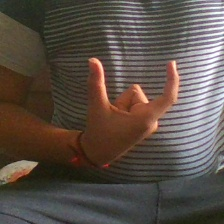

In [ ]:
# Open CV is used for computer vision specifically.
# imread loads the specific file
# imshow displays the image in the particular folder.


img=cv2.imread('//content/drive/MyDrive/kaggle_folder/isl-dataset-double-handed/test/u/u10.jpg')
cv2_imshow(img)

In [ ]:
# creating the class directory
# there are 26 alphabets thus making 26 classes

array = [chr(ord('a')+i) for i in range(26)]
label_dictionary = {i:array[i] for i in range(len(array))}
label_dictionary

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

In [ ]:
# this is a define function created to display images from the training, valid and testing folders.
# the number of images set to display is 5 for all the classes


def show_samples(X,y,n=30):
    classes = np.unique(y)
    classNo = 0
    for class1 in classes:
        imgs = X[y == class1][:n]
        j = 5
        i = n // 5
        plt.figure(figsize=(15,1))
        for (c,img) in enumerate(imgs,1):
            plt.subplot(i,j,c)
            plt.imshow(img)
            plt.xticks([])
            plt.yticks([])
        plt.suptitle(f'Alphabet: {label_dictionary[class1]}')
        classNo += 1
        if classNo == 15: 
            break

In [ ]:
batch1 = train_generator.next()
show_samples(batch1[0], batch1[1].argmax(axis=1),n=5)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
train_imgs, train_labels = next(train_batches)

NameError: ignored

In [ ]:
plotImages(train_imgs)
print(train_labels)

## **Model 1**

In [ ]:
# using a pre-trained model called mobilenet
# keras.applications.mobilenet.preprocess_input is used
# the target size is set to 224, 224 and since it is an RGB image it is set to 3
# image data generator is used to augment the data
# image augmentation helps with lower memory usage
# model receives new variation in each epoch.
# flow_from_directory allows reading the images from the directory and augment them while the neural network model learns on the training data.

train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size =(224,224), batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size =(224,224), batch_size=32)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size =(224,224), batch_size=32, shuffle=False)

Found 7323 images belonging to 26 classes.
Found 2100 images belonging to 26 classes.
Found 1043 images belonging to 26 classes.


In [ ]:
# The various layers of  MobileNet which is a pre-trained model built on ImageNet
mobile = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
# removing the last 5 layers of the MobileNet

x = mobile.layers[-6].output
output = Dense(units=26, activation='softmax')(x)

In [ ]:
# assigning the variable x and output to model

model = tf.keras.Model(inputs=mobile.input, outputs=output)

In [ ]:

# the new model summary

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
opt = tf.keras.optimizers.Adam(lr=.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
229/229 - 2410s - loss: 0.3495 - accuracy: 0.9335 - val_loss: 0.0861 - val_accuracy: 0.9976
Epoch 2/30
229/229 - 48s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 1.0000
Epoch 3/30
229/229 - 48s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 0.9995
Epoch 4/30
229/229 - 48s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 5/30
229/229 - 48s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 6/30
229/229 - 48s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 7/30
229/229 - 48s - loss: 7.0314e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 8/30
229/229 - 48s - loss: 5.5221e-04 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 9/30
229/229 - 48s - loss: 4.5824e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 10/30
229/229 - 48s - loss: 3.6039e-04 - accuracy: 1.0000 - val_loss: 0

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
  fig = plt.figure(figsize = (15,10))

  #Accuracy of the plot
  plt.subplot(221)
  plt.plot(history.history['accuracy'],'b--', label = "accuracy")
  plt.plot(history.history['val_accuracy'], 'r', label = "val_accuracy")
  plt.title("train_acc vs val_acc")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()

 #Plot loss function

  plt.subplot(222)
  plt.plot(history.history['loss'],'g--', label = "loss")
  plt.plot(history.history['val_loss'], 'r', label = "val_loss")
  plt.title("train_loss vs val_loss")
  plt.ylabel("loss")
  plt.xlabel("epochs")

  plt.legend()
  plt.show()

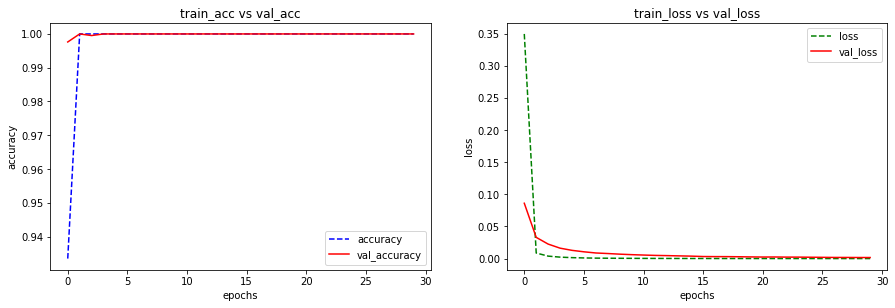

In [ ]:
plot_accuracy_loss(history)

## **Evaluation of the model 1 using Test Set**

In [ ]:
model.evaluate(test_batches)

33/33 [==============================] - 247s 8s/step - loss: 0.0248 - accuracy: 0.9933


[0.02476431243121624, 0.9932885766029358]

In [ ]:
test_labels = test_batches.classes

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['a', 'b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


Confusion matrix, without normalization
[[39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0 38  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  2 37  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 40  0  0  0 

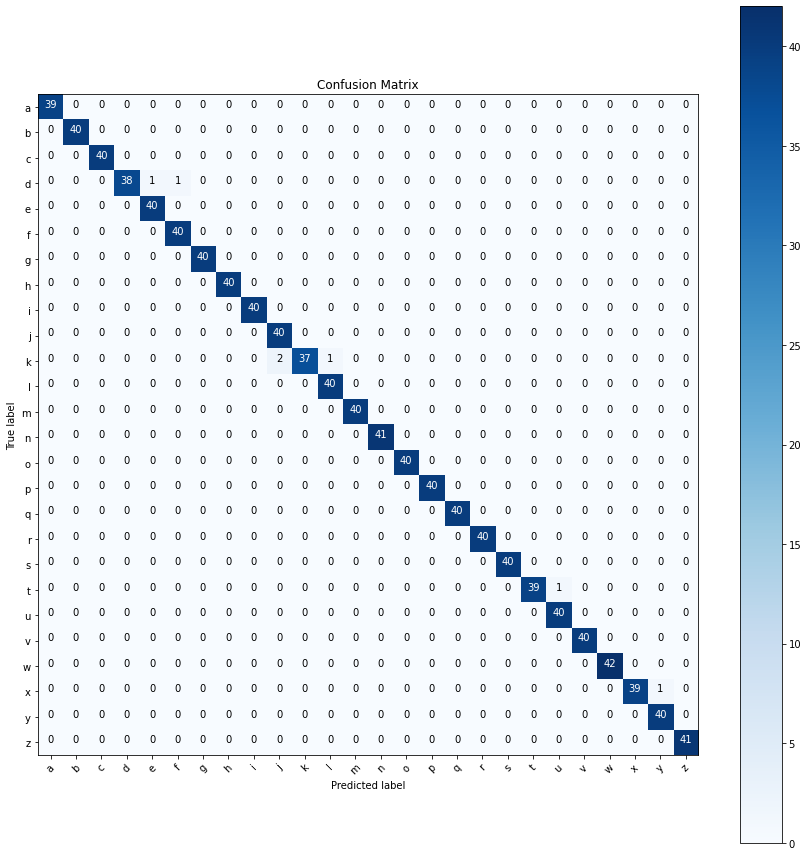

In [ ]:
plt.subplots(figsize=(12, 12))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
report = metrics.classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1),  target_names=cm_plot_labels)
print(report) 

              precision    recall  f1-score   support

           a       1.00      1.00      1.00        39
           b       1.00      1.00      1.00        40
           c       1.00      1.00      1.00        40
           d       1.00      0.95      0.97        40
           e       0.98      1.00      0.99        40
           f       0.98      1.00      0.99        40
           g       1.00      1.00      1.00        40
           h       1.00      1.00      1.00        40
           i       1.00      1.00      1.00        40
           j       0.95      1.00      0.98        40
           k       1.00      0.93      0.96        40
           l       0.98      1.00      0.99        40
           m       1.00      1.00      1.00        40
           n       1.00      1.00      1.00        41
           o       1.00      1.00      1.00        40
           p       1.00      1.00      1.00        40
           q       1.00      1.00      1.00        40
           r       1.00    

## **Model 2**

In [ ]:
# the target size is set to 224, 224 and since it is an RGB image it is set to 3
# image data generator is used to augment the data
# image augmentation helps with lower memory usage
# the image is rescaled to 1./255
# the imageDataGenerator rotation range is between 0 and 360




datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.05,
        zoom_range=(0.8,1.2),
        width_shift_range=0.05,
        height_shift_range=0.05,
        rotation_range=40,
        brightness_range=(0.5,1.5),
        channel_shift_range=1,
        horizontal_flip=True)

train_generator = datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=256,
        class_mode='categorical')
valid_generator = datagen.flow_from_directory(
        valid_path,
        target_size=(224,224),
        batch_size=256,
        class_mode='categorical')

test_generator = datagen.flow_from_directory(
        test_path,
        target_size=(224,224),
        batch_size=256,
        class_mode='categorical', shuffle = False)

Found 7323 images belonging to 26 classes.
Found 2100 images belonging to 26 classes.
Found 1043 images belonging to 26 classes.


In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential


model2 = Sequential()

model2.add(Conv2D(16,kernel_size=8,activation='relu',input_shape=(224,224,3),padding='same'))
model2.add(MaxPooling2D(pool_size=(8,8),strides=(8,8),padding='same'))
model2.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(4,4),strides=(4,4),padding='same'))
model2.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model2.add(Flatten())
model2.add(Dense(units=26,activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      3088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 26)                8

In [ ]:
learn_sched = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=8000,
    decay_rate=0.01)
opt = tf.keras.optimizers.Adam(learning_rate=learn_sched)
model2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = model2.fit(x=train_generator,
            steps_per_epoch=len(train_generator),
            validation_data=valid_generator,
            validation_steps=len(valid_generator),
            epochs=30,
            verbose=2
)

Epoch 1/30
29/29 - 131s - loss: 3.1316 - accuracy: 0.1300 - val_loss: 3.2084 - val_accuracy: 0.1190
Epoch 2/30
29/29 - 128s - loss: 2.2405 - accuracy: 0.3346 - val_loss: 2.9069 - val_accuracy: 0.2195
Epoch 3/30
29/29 - 128s - loss: 1.8140 - accuracy: 0.4573 - val_loss: 2.9417 - val_accuracy: 0.2705
Epoch 4/30
29/29 - 131s - loss: 1.5523 - accuracy: 0.5398 - val_loss: 2.6049 - val_accuracy: 0.2738
Epoch 5/30
29/29 - 132s - loss: 1.4093 - accuracy: 0.5726 - val_loss: 2.4834 - val_accuracy: 0.3129
Epoch 6/30
29/29 - 133s - loss: 1.2344 - accuracy: 0.6297 - val_loss: 2.2259 - val_accuracy: 0.3586
Epoch 7/30
29/29 - 135s - loss: 1.1245 - accuracy: 0.6698 - val_loss: 2.0939 - val_accuracy: 0.4057
Epoch 8/30
29/29 - 135s - loss: 1.0647 - accuracy: 0.6770 - val_loss: 2.0716 - val_accuracy: 0.4110
Epoch 9/30
29/29 - 134s - loss: 0.9733 - accuracy: 0.7057 - val_loss: 1.8943 - val_accuracy: 0.4552
Epoch 10/30
29/29 - 133s - loss: 0.8976 - accuracy: 0.7254 - val_loss: 1.8669 - val_accuracy: 0.4614

In [ ]:
def plot_accuracy_loss(history1):
  fig = plt.figure(figsize = (15,10))

  #Accuracy of the plot
  plt.subplot(221)
  plt.plot(history1.history['accuracy'],'b--', label = "acc")
  plt.plot(history1.history['val_accuracy'], 'r', label = "val_acc")
  plt.title("train_acc vs val_acc")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()

 #Plot loss function

  plt.subplot(222)
  plt.plot(history1.history['loss'],'g--', label = "loss")
  plt.plot(history1.history['val_loss'], 'r', label = "val_loss")
  plt.title("train_loss vs val_loss")
  plt.ylabel("loss")
  plt.xlabel("epochs")

  plt.legend()
  plt.show()

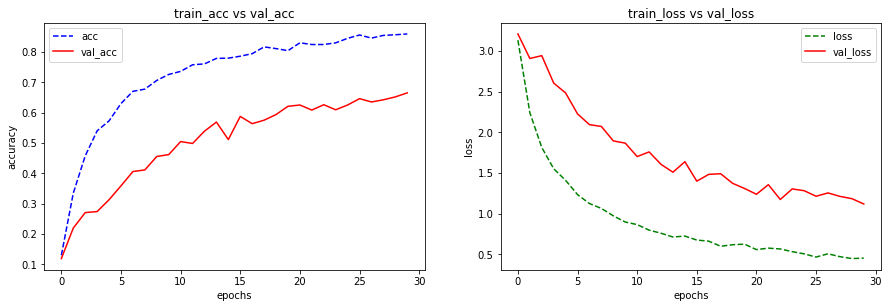

In [ ]:
plot_accuracy_loss(history1)

In [ ]:
model2.evaluate(test_generator)

5/5 [==============================] - 15s 3s/step - loss: 1.0137 - accuracy: 0.6798


[1.013669729232788, 0.6797698736190796]

In [ ]:
test_labels1 = test_generator.classes

In [ ]:
predictions1 = model2.predict(x=test_generator, steps=len(test_generator), verbose=0)

In [ ]:
cm1 = confusion_matrix(y_true=test_labels1, y_pred=predictions1.argmax(axis=1))

In [ ]:
test_generator.class_indices

In [ ]:
plt.subplots(figsize=(12, 12))
plot_confusion_matrix(cm=cm1, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
report1 = metrics.classification_report(y_true=test_labels1, y_pred=predictions1.argmax(axis=1),  target_names=cm_plot_labels)
print(report1) 

              precision    recall  f1-score   support

           a       0.56      0.72      0.63        39
           b       0.69      0.72      0.71        40
           c       0.64      0.72      0.68        40
           d       0.41      0.45      0.43        40
           e       0.56      0.70      0.62        40
           f       0.52      0.55      0.54        40
           g       0.71      0.60      0.65        40
           h       0.92      0.85      0.88        40
           i       0.83      0.60      0.70        40
           j       0.85      0.72      0.78        40
           k       0.58      0.45      0.51        40
           l       0.58      0.75      0.65        40
           m       0.67      0.75      0.71        40
           n       0.69      0.61      0.65        41
           o       0.79      0.78      0.78        40
           p       0.86      0.78      0.82        40
           q       0.76      0.70      0.73        40
           r       0.83    

## **Model2 Fine-Tuning:**






In [ ]:
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.05,
        zoom_range=(0.8,1.2),
        width_shift_range=0.05,
        height_shift_range=0.05,
        rotation_range=30,
        brightness_range=(0.5,1.5),
        channel_shift_range=1,
        horizontal_flip=True)

train_generator = datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=256,
        class_mode='categorical')
valid_generator = datagen.flow_from_directory(
        valid_path,
        target_size=(224,224),
        batch_size=256,
        class_mode='categorical')

test_generator = datagen.flow_from_directory(
        test_path,
        target_size=(224,224),
        batch_size=256,
        class_mode='categorical', shuffle = False)

Found 7323 images belonging to 26 classes.
Found 2100 images belonging to 26 classes.
Found 1043 images belonging to 26 classes.


In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential


model2_ft = Sequential()

model2_ft.add(Conv2D(16,kernel_size=8,activation='relu',input_shape=(224,224,3),padding='same'))
model2_ft.add(MaxPooling2D(pool_size=(8,8),strides=(8,8),padding='same'))
model2_ft.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model2_ft.add(MaxPooling2D(pool_size=(4,4),strides=(4,4),padding='same'))
model2_ft.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model2_ft.add(Flatten())
model2_ft.add(Dropout(0.25))
model2_ft.add(Dense(units=26,activation='softmax'))



In [ ]:
model2_ft.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      3088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3136)              0

In [ ]:
learn_sched = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=8000,
    decay_rate=0.01)
opt = tf.keras.optimizers.Adam(learning_rate=learn_sched)
model2_ft.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_ft = model2_ft.fit(x=train_generator,
            steps_per_epoch=len(train_generator),
            validation_data=valid_generator,
            validation_steps=len(valid_generator),
            epochs=30,
            verbose=2
)

Epoch 1/30
29/29 - 148s - loss: 2.7860 - accuracy: 0.1834 - val_loss: 2.9590 - val_accuracy: 0.1686
Epoch 2/30
29/29 - 136s - loss: 1.9597 - accuracy: 0.4135 - val_loss: 2.6399 - val_accuracy: 0.2833
Epoch 3/30
29/29 - 136s - loss: 1.5458 - accuracy: 0.5345 - val_loss: 2.2771 - val_accuracy: 0.3405
Epoch 4/30
29/29 - 133s - loss: 1.3220 - accuracy: 0.6040 - val_loss: 2.1699 - val_accuracy: 0.3867
Epoch 5/30
29/29 - 131s - loss: 1.1485 - accuracy: 0.6506 - val_loss: 1.8631 - val_accuracy: 0.4505
Epoch 6/30
29/29 - 132s - loss: 1.0727 - accuracy: 0.6731 - val_loss: 1.6832 - val_accuracy: 0.4886
Epoch 7/30
29/29 - 129s - loss: 0.9465 - accuracy: 0.7083 - val_loss: 1.5549 - val_accuracy: 0.5443
Epoch 8/30
29/29 - 133s - loss: 0.9164 - accuracy: 0.7212 - val_loss: 1.6479 - val_accuracy: 0.5048
Epoch 9/30
29/29 - 129s - loss: 0.8763 - accuracy: 0.7343 - val_loss: 1.4861 - val_accuracy: 0.5505
Epoch 10/30
29/29 - 129s - loss: 0.8029 - accuracy: 0.7568 - val_loss: 1.3748 - val_accuracy: 0.5886

In [ ]:
def plot_accuracy_loss(history_ft):
  fig = plt.figure(figsize = (15,10))

  #Accuracy of the plot
  plt.subplot(221)
  plt.plot(history_ft.history['accuracy'],'b--', label = "acc")
  plt.plot(history_ft.history['val_accuracy'], 'r', label = "val_acc")
  plt.title("train_acc vs val_acc")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()

 #Plot loss function

  plt.subplot(222)
  plt.plot(history_ft.history['loss'],'g--', label = "loss")
  plt.plot(history_ft.history['val_loss'], 'r', label = "val_loss")
  plt.title("train_loss vs val_loss")
  plt.ylabel("loss")
  plt.xlabel("epochs")

  plt.legend()
  plt.show()

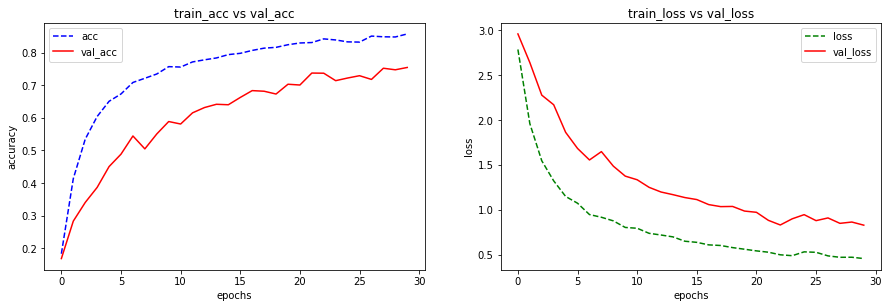

In [ ]:
plot_accuracy_loss(history_ft)

In [ ]:
model2_ft.evaluate(test_generator)

5/5 [==============================] - 15s 3s/step - loss: 0.6974 - accuracy: 0.7939


[0.6974185705184937, 0.793863832950592]

In [ ]:
cm_plot_labels = ['a', 'b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_labels = test_generator.classes

In [ ]:
pred = model2_ft.predict(x=test_generator, steps=len(test_generator), verbose=0)

In [ ]:
cm1 = confusion_matrix(y_true=test_labels, y_pred=pred.argmax(axis=1))

Confusion matrix, without normalization
[[33  0  0  1  0  2  0  1  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0
   0  0]
 [ 2 29  1  1  0  1  1  3  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0
   0  0]
 [ 1  0 31  0  1  0  0  0  2  3  1  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0]
 [ 2  1  5 18  0  3  0  0  1  0  1  0  0  0  0  3  4  0  1  0  0  0  0  1
   0  0]
 [ 2  0  0  1 29  3  1  0  1  1  0  0  0  0  0  0  1  0  0  0  0  0  1  0
   0  0]
 [ 3  1  0  1  9 21  2  1  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0
   0  0]
 [ 1  0  1  1  0  0 31  0  1  2  0  0  1  0  0  0  1  0  0  0  0  0  0  1
   0  0]
 [ 0  0  0  0  0  0  0 38  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  1]
 [ 1  0  0  0  0  0  0  0 32  1  2  2  0  0  0  0  0  0  0  1  1  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 37  0  0  0  0  0  1  0  0  1  0  0  1  0  0
   0  0]
 [ 1  0  4  0  0  0  1  0  0  6 28  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  3  0  0  0  0  0  2  0  0 32  0  0  2 

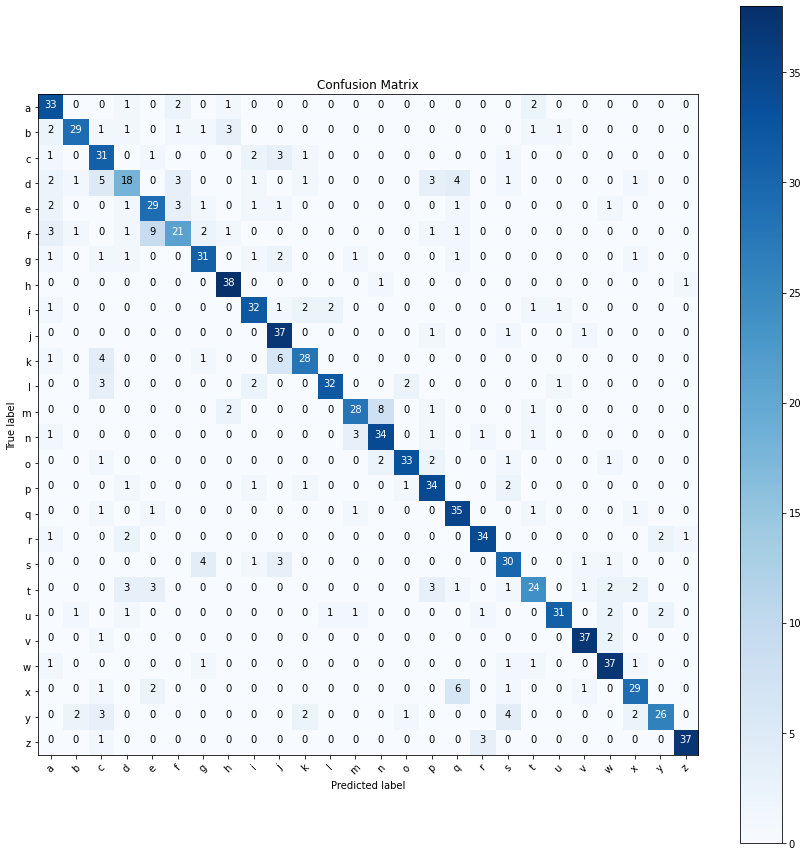

In [ ]:
plt.subplots(figsize=(12, 12))
plot_confusion_matrix(cm=cm1, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
report1 = metrics.classification_report(y_true=test_labels, y_pred=pred.argmax(axis=1),  target_names=cm_plot_labels)
print(report1) 

              precision    recall  f1-score   support

           a       0.67      0.85      0.75        39
           b       0.85      0.72      0.78        40
           c       0.58      0.78      0.67        40
           d       0.60      0.45      0.51        40
           e       0.64      0.72      0.68        40
           f       0.70      0.53      0.60        40
           g       0.76      0.78      0.77        40
           h       0.84      0.95      0.89        40
           i       0.78      0.80      0.79        40
           j       0.70      0.93      0.80        40
           k       0.80      0.70      0.75        40
           l       0.91      0.80      0.85        40
           m       0.82      0.70      0.76        40
           n       0.76      0.83      0.79        41
           o       0.89      0.82      0.86        40
           p       0.74      0.85      0.79        40
           q       0.71      0.88      0.79        40
           r       0.87    

In [ ]:
batch_size  = 128

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = datagen.flow_from_directory(
        train_path,  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 300x300
        batch_size=batch_size)  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size)

test_generator = datagen.flow_from_directory(
        test_path,
        target_size=(224,224),
        batch_size=batch_size,
        shuffle = False)

Found 7323 images belonging to 26 classes.
Found 2100 images belonging to 26 classes.
Found 1043 images belonging to 26 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model_cc = Sequential()
model_cc.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model_cc.add(Activation('relu'))
model_cc.add(MaxPooling2D(pool_size=(2, 2)))
model_cc.add(Conv2D(32, (3, 3)))
model_cc.add(Activation('relu'))
model_cc.add(MaxPooling2D(pool_size=(2, 2)))
model_cc.add(Conv2D(64, (3, 3)))
model_cc.add(Activation('relu'))
model_cc.add(MaxPooling2D(pool_size=(2, 2)))
model_cc.add(BatchNormalization()) 
model_cc.add(Flatten()) 
model_cc.add(Dense(128))
model_cc.add(Activation('relu'))
model_cc.add(Dropout(0.5))
model_cc.add(Dense(64))
model_cc.add(Activation('relu'))
model_cc.add(Dense(units=26, activation='softmax'))

In [ ]:
model_cc.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_cc.fit(train_generator,
            steps_per_epoch=len(train_generator),
            validation_data=validation_generator,
            validation_steps=len(validation_generator),
            epochs=30)

NameError: ignored

# **Model using VGG16 Pre-processing:**






In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['a', 'b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'], batch_size=20)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['a', 'b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'], batch_size=20)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['a', 'b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'], batch_size=20, shuffle=False)

Found 7323 images belonging to 26 classes.
Found 2100 images belonging to 26 classes.
Found 1043 images belonging to 26 classes.


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Sequential

model3 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=26, activation='softmax')
])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 26)                5218330   
Total params: 5,237,722
Trainable params: 5,237,722
Non-trainable params: 0
______________________________________________

In [ ]:
from tensorflow.keras.optimizers import Adam
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
367/367 - 43s - loss: 10.5115 - accuracy: 0.8602 - val_loss: 0.4037 - val_accuracy: 0.9319
Epoch 2/30
367/367 - 35s - loss: 0.1061 - accuracy: 0.9854 - val_loss: 1.1743 - val_accuracy: 0.8881
Epoch 3/30
367/367 - 36s - loss: 0.0252 - accuracy: 0.9962 - val_loss: 0.4745 - val_accuracy: 0.9152
Epoch 4/30
367/367 - 36s - loss: 0.0651 - accuracy: 0.9936 - val_loss: 1.0743 - val_accuracy: 0.8519
Epoch 5/30
367/367 - 35s - loss: 0.0167 - accuracy: 0.9974 - val_loss: 0.5223 - val_accuracy: 0.9400
Epoch 6/30
367/367 - 34s - loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.5078 - val_accuracy: 0.9371
Epoch 7/30
367/367 - 35s - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.4580 - val_accuracy: 0.9390
Epoch 8/30
367/367 - 34s - loss: 3.1102e-06 - accuracy: 1.0000 - val_loss: 0.4552 - val_accuracy: 0.9390
Epoch 9/30
367/367 - 36s - loss: 1.7801e-06 - accuracy: 1.0000 - val_loss: 0.4529 - val_accuracy: 0.9390
Epoch 10/30
367/367 - 36s - loss: 1.3852e-06 - accuracy: 1.0000 - val_loss: 0.4508

In [ ]:
def plot_accuracy_loss(history3):
  fig = plt.figure(figsize = (15,10))

  #Accuracy of the plot
  plt.subplot(221)
  plt.plot(history3.history['accuracy'],'b--', label = "acc")
  plt.plot(history3.history['val_accuracy'], 'r', label = "val_acc")
  plt.title("train_acc vs val_acc")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()

 #Plot loss function

  plt.subplot(222)
  plt.plot(history3.history['loss'],'g--', label = "loss")
  plt.plot(history3.history['val_loss'], 'r', label = "val_loss")
  plt.title("train_loss vs val_loss")
  plt.ylabel("loss")
  plt.xlabel("epochs")

  plt.legend()
  plt.show()

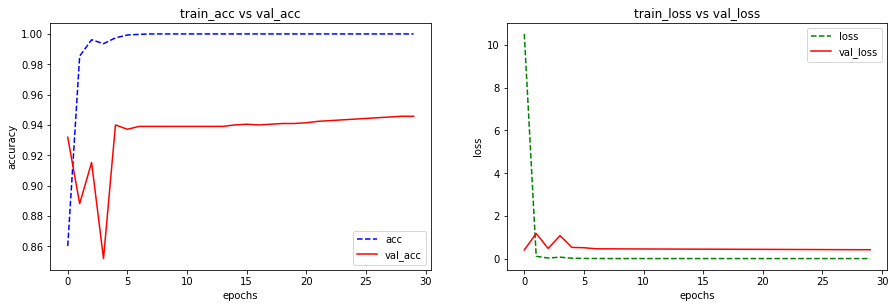

In [ ]:
plot_accuracy_loss(history3)

In [ ]:
model3.evaluate(test_batches)

53/53 [==============================] - 4s 78ms/step - loss: 0.3106 - accuracy: 0.9616


[0.3105798661708832, 0.9616490602493286]

In [ ]:
cm_plot_labels = ['a', 'b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_labels = test_batches.classes

In [ ]:
pred = model3.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
cm1 = confusion_matrix(y_true=test_labels, y_pred=pred.argmax(axis=1))

Confusion matrix, without normalization
[[39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [15 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0 39  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 39  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0 39  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 40  0  0  0 

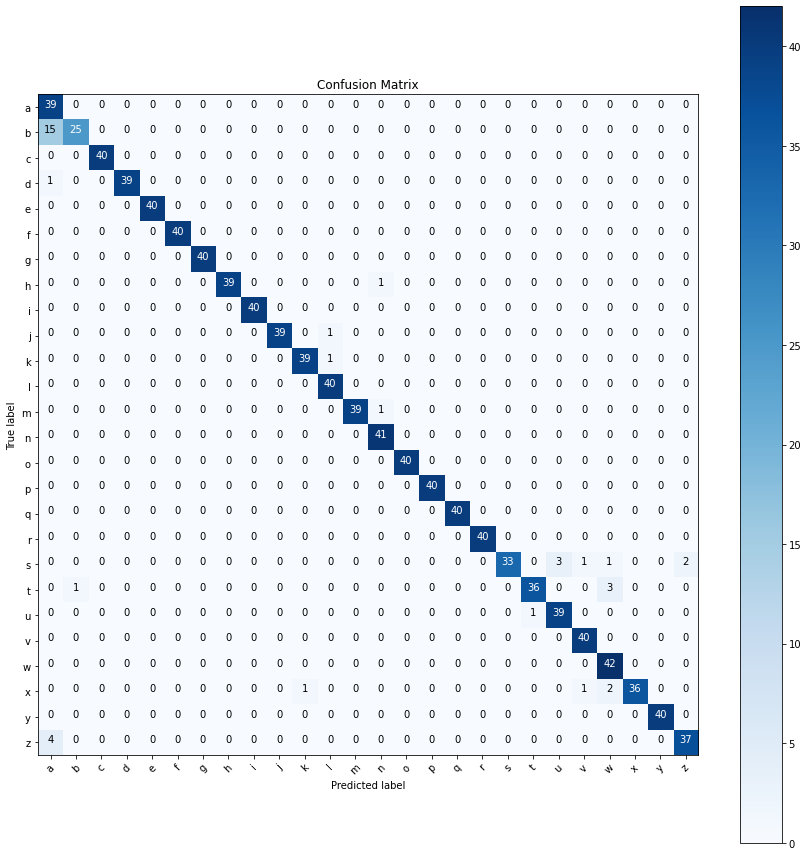

In [ ]:
plt.subplots(figsize=(12, 12))
plot_confusion_matrix(cm=cm1, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
report1 = metrics.classification_report(y_true=test_labels, y_pred=pred.argmax(axis=1),  target_names=cm_plot_labels)
print(report1) 

              precision    recall  f1-score   support

           a       0.66      1.00      0.80        39
           b       0.96      0.62      0.76        40
           c       1.00      1.00      1.00        40
           d       1.00      0.97      0.99        40
           e       1.00      1.00      1.00        40
           f       1.00      1.00      1.00        40
           g       1.00      1.00      1.00        40
           h       1.00      0.97      0.99        40
           i       1.00      1.00      1.00        40
           j       1.00      0.97      0.99        40
           k       0.97      0.97      0.97        40
           l       0.95      1.00      0.98        40
           m       1.00      0.97      0.99        40
           n       0.95      1.00      0.98        41
           o       1.00      1.00      1.00        40
           p       1.00      1.00      1.00        40
           q       1.00      1.00      1.00        40
           r       1.00    